#### Brief Information :  
This dataset is from "World Happiness Report" in 2017. My aim is to analyze the features that effect happiness score and then predict it. But my point is not including GDP or any economical data. So the new prediction only contains social features. I added my new features from UN website dataset for 2017. We are gonna be looking at the happiness score datas from other perspectives.

In [1140]:
#importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%pylab inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


Populating the interactive namespace from numpy and matplotlib


In [1086]:
data2017 = pd.read_csv(r'C:\Users\beyzanur.arslan\Desktop\2017.csv')
data2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


#### The following columns:
GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country. The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer.

In [1141]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


In [251]:
data2017.isnull().sum().sum()

0

In [248]:
data2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


Text(0.5, 0, 'Country Ranking')

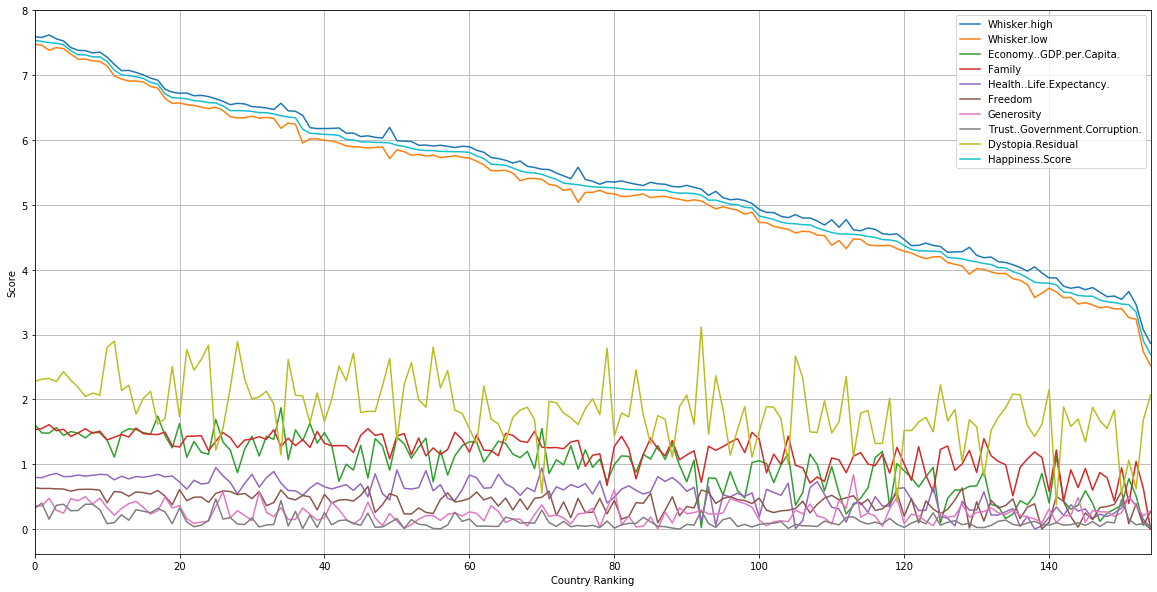

In [1144]:
plt.rcParams["figure.figsize"] = (20,10)
data_plot = data2017.loc[:,['Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', "Happiness.Score" ]]
data_plot.plot()
plt.grid()
plt.ylabel("Score")
plt.xlabel("Country Ranking")

#### To see clearly other features, we drop the whiskers and happiness score

Text(0.5, 0, 'Country Ranking')

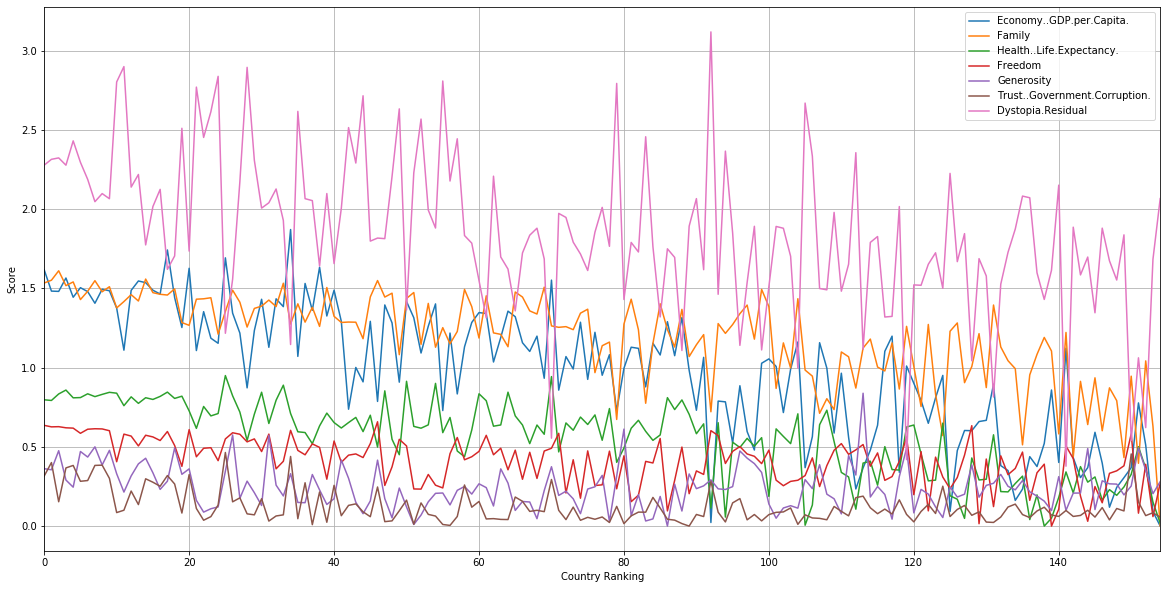

In [1145]:
data_plot = data2017.loc[:,['Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual']]
data_plot.plot()
plt.grid()
plt.ylabel("Score")
plt.xlabel("Country Ranking")

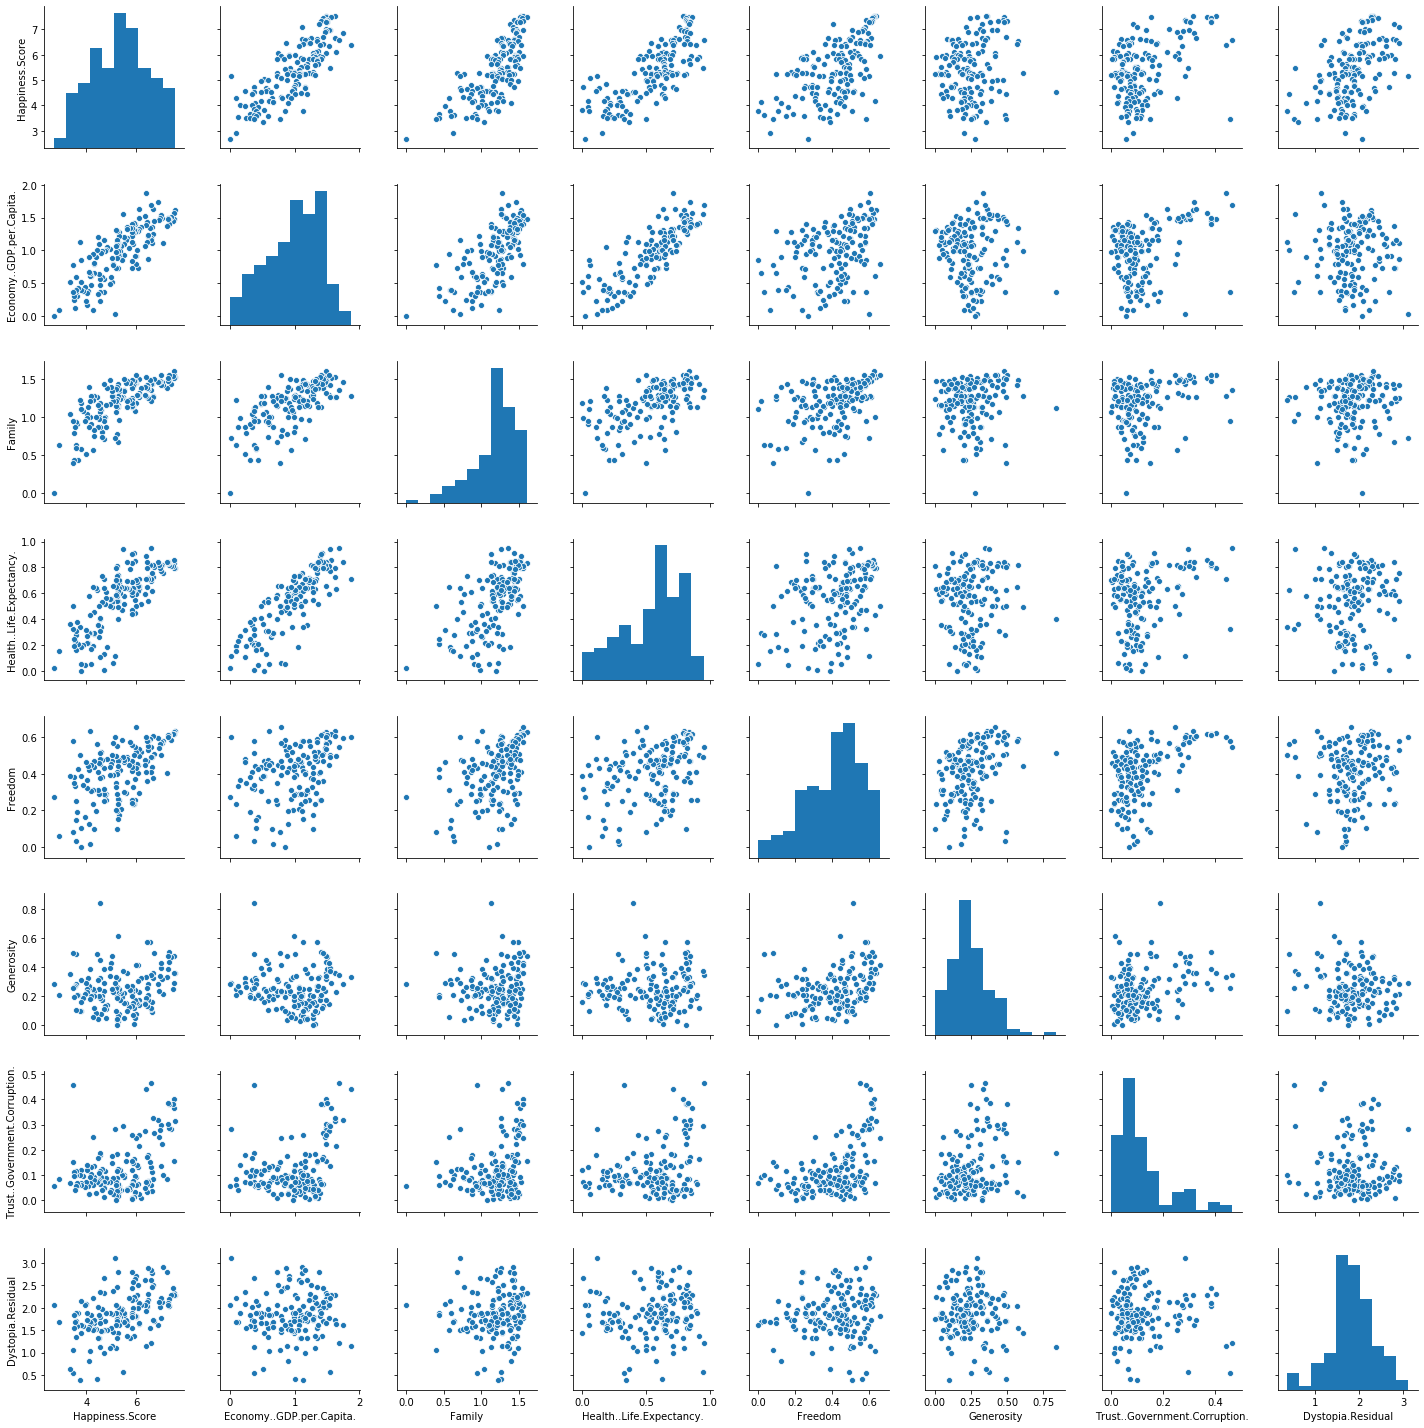

In [289]:
sns.pairplot(data2017.iloc[:,2:])
plt.show()

### A brief EDA

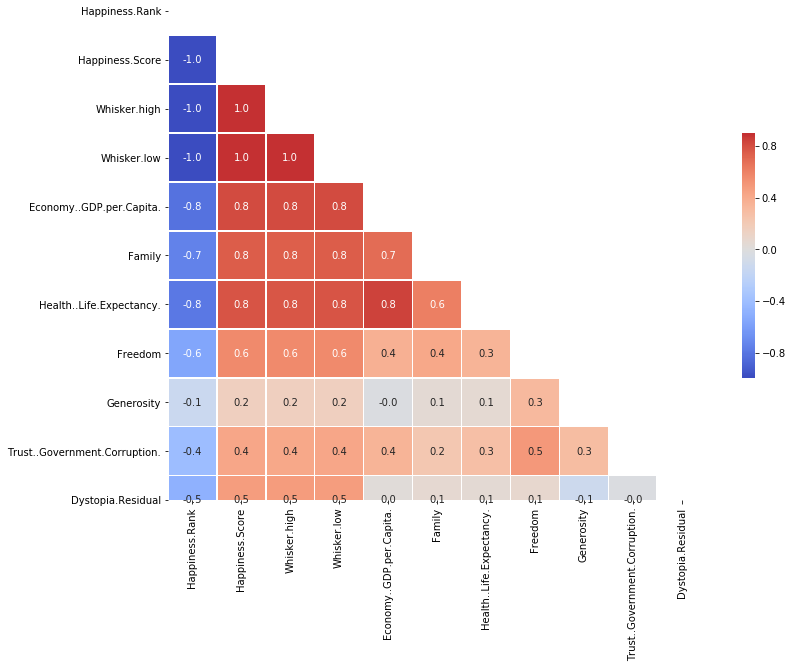

In [1142]:
#creating correlation matrix

corr = data2017.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,annot= True, mask=mask, cmap= 'coolwarm', vmax=.9, center=0,
            square=True, linewidths=.5, fmt= '.1f', cbar_kws={"shrink": .5})

In [200]:
c = corr.abs()

sol = (c.where(np.triu(np.ones(c.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol[:10]

Overall rank    Score                      0.989096
GDP per capita  Healthy life expectancy    0.835462
Overall rank    GDP per capita             0.801947
Score           GDP per capita             0.793883
Overall rank    Healthy life expectancy    0.787411
Score           Healthy life expectancy    0.779883
                Social support             0.777058
Overall rank    Social support             0.767465
GDP per capita  Social support             0.754906
Social support  Healthy life expectancy    0.719009
dtype: float64

In [1149]:
corr.iloc[:,1].sort_values()

Happiness.Rank                  -0.992774
Generosity                       0.155256
Trust..Government.Corruption.    0.429080
Dystopia.Residual                0.475355
Freedom                          0.570137
Family                           0.752737
Health..Life.Expectancy.         0.781951
Economy..GDP.per.Capita.         0.812469
Whisker.high                     0.999497
Whisker.low                      0.999520
Happiness.Score                  1.000000
Name: Happiness.Score, dtype: float64

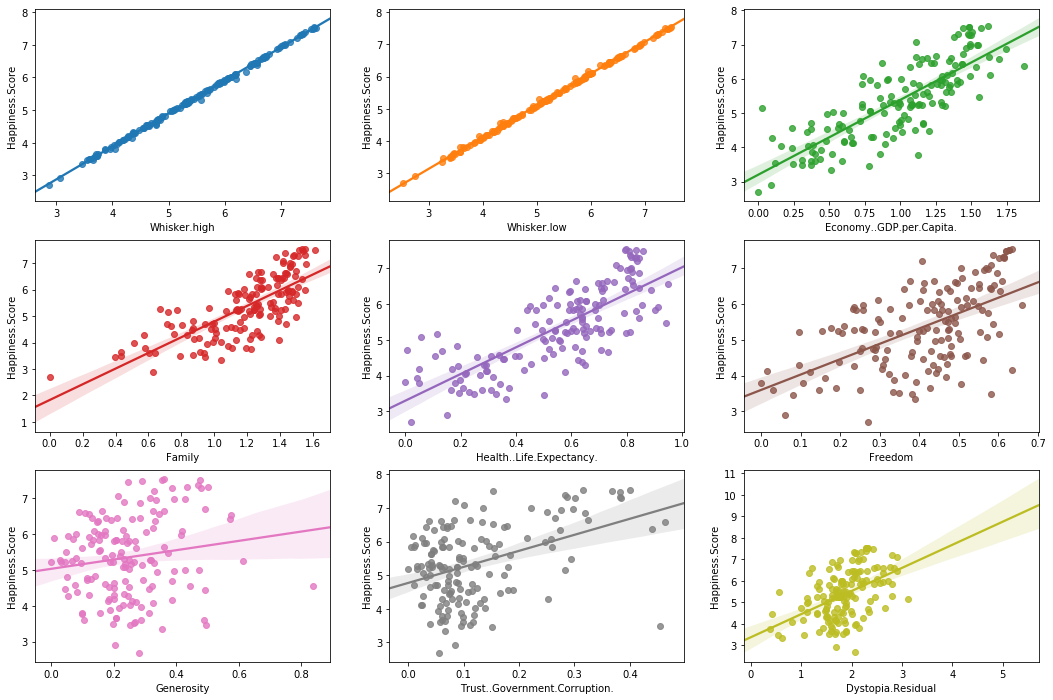

In [285]:
features_to_analyse = ['Whisker.high',
       'Whisker.low','Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Happiness.Score']
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='Happiness.Score', data=data2017[features_to_analyse], ax=ax)

Whiskers are highly correlated as predictable and also cant have them in other years' dataset, so I dropped them

In [1150]:
data2017 = data2017.drop(['Whisker.high','Whisker.low'], axis=1)

In [1154]:
filter1 = data2017['Happiness.Score']>=7
happy_countries = data2017[filter1]
happy_countries[:10]

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


## Happiness Score Prediction

In [1190]:
X= data2017.iloc[:,3:]
y= data2017["Happiness.Score"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True)

In [1195]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [1196]:
print('train score: {:.2f}'.format(regressor.score(X_train, y_train)))
print('test score: {:.2f}'.format(regressor.score(X_test, y_test)))
y_predicted = regressor.predict(X_test)
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))

train score: 0.99
test score: 0.85
Mean squared error: 0.14


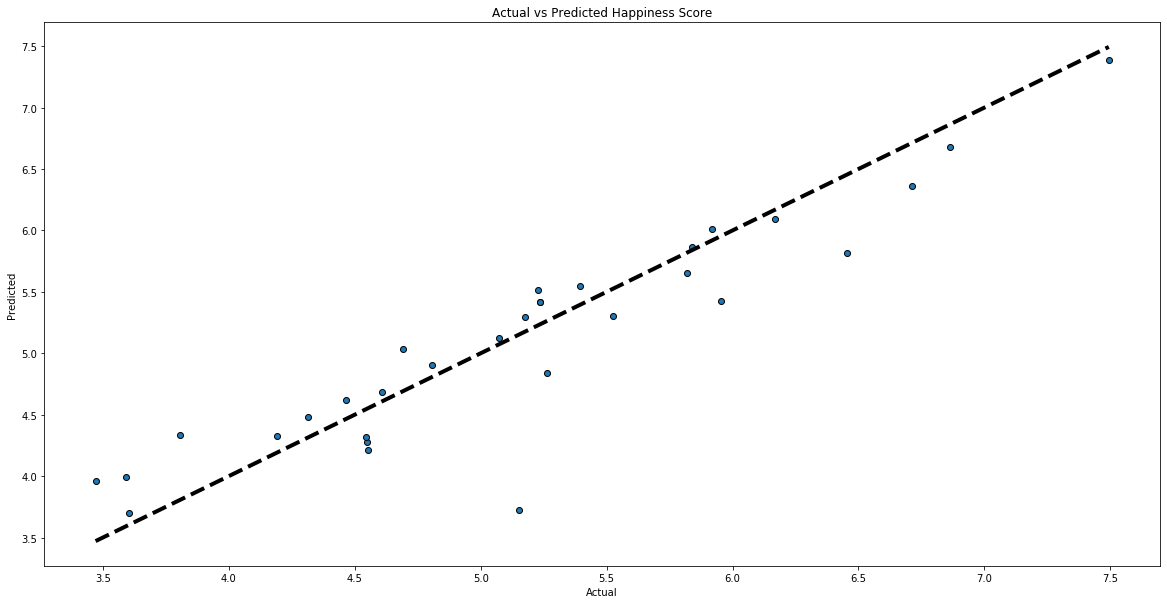

In [1197]:
y_predicted = regressor.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted Happiness Score")
plt.show()

In [1202]:
names=X.columns
sorted(zip(map(lambda x: round(x, 4), regressor.feature_importances_), names), reverse=True)

[(0.3636, 'Health..Life.Expectancy.'),
 (0.3018, 'Economy..GDP.per.Capita.'),
 (0.1345, 'Family'),
 (0.1199, 'Dystopia.Residual'),
 (0.0546, 'Freedom'),
 (0.0129, 'Generosity'),
 (0.0126, 'Trust..Government.Corruption.')]

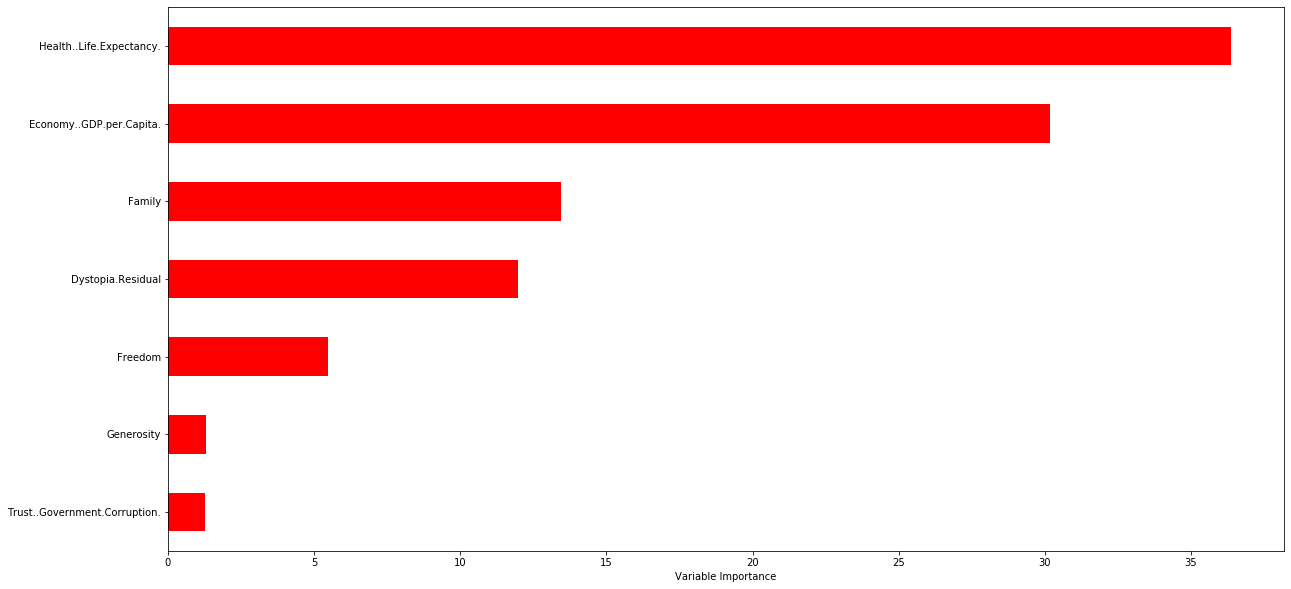

In [1198]:
Importance = pd.DataFrame({'Importance':regressor.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by ='Importance',
                      axis = 0,
                      ascending = True).plot(kind = 'barh',
                                            color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [1199]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

print('train score: {:.2f}'.format(model.score(X_train, y_train)))
print('test score: {:.2f}'.format(model.score(X_test, y_test)))
y_predicted = model.predict(X_test)
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))

train score: 1.00
test score: 1.00
Mean squared error: 0.00


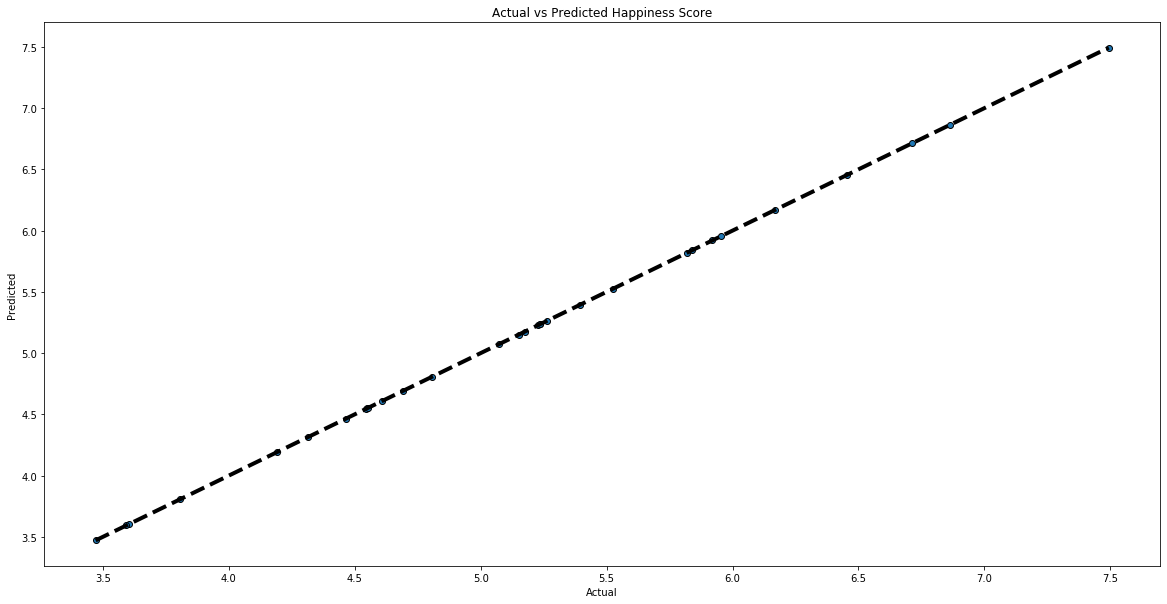

In [1200]:
y_predicted = model.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted Happiness Score")
plt.show()

Multiple Linear Regression worked better than Random Forest Regressor for this dataset. 

### without GDP

In [1447]:
data2017_2 = data2017.drop('Economy..GDP.per.Capita.', axis=1)
X= data2017_2.iloc[:,3:]
y= data2017_2["Happiness.Score"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True)

In [1448]:
model = LinearRegression().fit(X_train, y_train)

print('train score: {:.2f}'.format(model.score(X_train, y_train)))
print('test score: {:.2f}'.format(model.score(X_test, y_test)))
y_predicted = model.predict(X_test)
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))

train score: 0.97
test score: 0.95
Mean squared error: 0.06


Score decreased a bit, now we add our new features.

# Changing new columns to old ones

In [1237]:
undata = pd.read_csv(r'C:\Users\beyzanur.arslan\Desktop\country_profile_variables.csv')
undata.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [1210]:
undata.isnull().sum().sum()

0

In [1238]:
undata.shape

(229, 50)

### dropping highly correlated data

In [1239]:
c = undata.corr().abs()

sol = (c.where(np.triu(np.ones(c.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol[:10]

Agricultural production index (2004-2006=100)      Food production index (2004-2006=100)                    0.999156
Health: Total expenditure (% of GDP)               Seats held by women in national parliaments %            0.879372
Economy: Industry (% of GVA)                       Economy: Services and other activity (% of GVA)          0.837173
GDP: Gross domestic product (million current US$)  CO2 emission estimates (million tons/tons per capita)    0.837124
Economy: Industry (% of GVA)                       Seats held by women in national parliaments %            0.723719
Population in thousands (2017)                     CO2 emission estimates (million tons/tons per capita)    0.699263
Economy: Industry (% of GVA)                       Health: Total expenditure (% of GDP)                     0.666418
Economy: Services and other activity (% of GVA)    Seats held by women in national parliaments %            0.595466
                                                   Health: Total

In [1240]:
corr_matrix = c

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

to_drop


['Economy: Services and other activity (% of GVA)',
 'Food production index (2004-2006=100)',
 'Seats held by women in national parliaments %',
 'CO2 emission estimates (million tons/tons per capita)']

In [1241]:
undata.drop(to_drop, axis=1, inplace=True)

In [258]:
undata.shape

(229, 46)

In [1259]:
data_all= pd.merge(left=data2017_2, right=undata,on=None, left_on='Country', right_on='country')
data_all.head()

,Country,Happiness.Rank,Happiness.Score,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,country,...,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Norway,1,7.537,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Norway,...,113.6,96.8,64,33.2,47.6/9.2,233,100.0/100.0,98.0/98.3,-99,-99
1,Denmark,2,7.522,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Denmark,...,128.3,96.3,47,14.4,33.5/5.9,119,100.0/100.0,99.6/99.6,-99,-99
2,Iceland,3,7.504,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Iceland,...,114.0,98.2,27,0.5,2.0/6.1,952,100.0/100.0,98.7/100.0,-99,-99
3,Switzerland,4,7.494,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Switzerland,...,142.0,88.0,74,31.6,35.3/4.3,126,100.0/100.0,99.9/99.8,-99,-99
4,Finland,5,7.469,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Finland,...,135.5,92.7,36,73.1,47.3/8.6,257,100.0/100.0,99.4/88.0,-99,-99


In [1261]:
data_all = data_all.drop("country", axis=1)

In [1262]:
data_all.shape

(135, 54)

### Dropping economical features

In [1329]:
data_last2 = data_all.drop(['GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)', "GDP per capita (current US$)"
       , 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Unemployment (% of labour force)', 'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)' , "Net Official Development Assist. received (% of GNI)"], axis=1)

In [1284]:
data_last2.head(3)

,Country,Happiness.Rank,Happiness.Score,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Region,...,Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)"
0,Norway,1,7.537,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,NorthernEurope,...,91.5/62.8,113.6,96.8,64,33.2,47.6/9.2,233,100.0/100.0,98.0/98.3,-99
1,Denmark,2,7.522,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,NorthernEurope,...,96.3/69.7,128.3,96.3,47,14.4,33.5/5.9,119,100.0/100.0,99.6/99.6,-99
2,Iceland,3,7.504,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,NorthernEurope,...,103.1/60.2,114.0,98.2,27,0.5,2.0/6.1,952,100.0/100.0,98.7/100.0,-99


In [1285]:
data_last2.describe(include=['object'])

,Country,Region,Surface area (km2),Employment: Industry (% of employed),Employment: Services (% of employed),Labour force participation (female/male pop. %),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",...,Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Threatened species (number),Forested area (% of land area),Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)"
count,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135
unique,135,19,135,99,116,135,128,50,57,47,...,127,120,118,125,128,125,135,100,125,85
top,Azerbaijan,WesternAsia,9251,19.2,40.3,40.7/58.3,-99,1.6,0.5,1.5,...,.../...,.../...,.../...,70.5,19.0,3.8,96.3/0.6,100.0/100.0,100.0/100.0,-99
freq,1,15,1,3,3,1,6,9,6,9,...,6,10,13,2,3,2,1,32,9,39


In [1330]:
data_last2 = data_last2.replace(to_replace='~0.0', value=0.0, regex=True)

In [1331]:
data_last2['Population growth rate (average annual %)'] = data_last2['Population growth rate (average annual %)'].astype(float)
data_last2["Fertility rate, total (live births per woman)"] = data_last2["Fertility rate, total (live births per woman)"].astype(float)
data_last2["Mobile-cellular subscriptions (per 100 inhabitants)"] = data_last2["Mobile-cellular subscriptions (per 100 inhabitants)"].astype(float)
data_last2["Threatened species (number)"] = data_last2["Threatened species (number)"].astype(float)


### Feature Selection

In [1332]:
data_last2["0-14 Age"] =data_last2["Population age distribution (0-14 / 60+ years, %)"].str.replace("/"," ")
data_last2["60+ years Age"] =data_last2["Population age distribution (0-14 / 60+ years, %)"].str.replace("/"," ")


In [1333]:
child= []
old= []
for i in range(data_last2.shape[0]):
    child.append(data_last2["0-14 Age"][i].split(" ")[0])
    old.append(data_last2["60+ years Age"][i].split(" ")[1])

In [1334]:
data_last2["0-14 Age"] = child
data_last2["60+ years Age"]= old

data_last2["0-14 Age"] = data_last2["0-14 Age"].astype(float)
data_last2["60+ years Age"] = data_last2["60+ years Age"].astype(float)

### Forested Area

In [1335]:
data_last2 = data_last2[data_last2["Forested area (% of land area)"] != 0.0]
data_last2["Forested area (% of land area)"]

0      47.6/9.2
1      33.5/5.9
2       2.0/6.1
3      35.3/4.3
4      47.3/8.6
         ...   
129     0.9/0.2
130     2.4/0.2
131     2.6/0.4
132     0.8/0.1
134     0.3/0.1
Name: Forested area (% of land area), Length: 133, dtype: object

In [1336]:
data_last2["Forested area Urban"] =data_last2["Forested area (% of land area)"].str.replace("/"," ")
data_last2["Forested area Rural"] =data_last2["Forested area (% of land area)"].str.replace("/"," ")


In [1337]:
data_last2 = data_last2.reset_index()
data_last2 = data_last2.drop("index", axis=1)

In [1338]:
data_last2["Forested area Urban"]

0      47.6 9.2
1      33.5 5.9
2       2.0 6.1
3      35.3 4.3
4      47.3 8.6
         ...   
128     0.9 0.2
129     2.4 0.2
130     2.6 0.4
131     0.8 0.1
132     0.3 0.1
Name: Forested area Urban, Length: 133, dtype: object

In [1339]:
urban= []
rural= []
for i in range(data_last2.shape[0]):
    urban.append(data_last2["Forested area Urban"][i].split(" ")[0])
    rural.append(data_last2["Forested area Rural"][i].split(" ")[1])

In [1340]:
data_last2["Forested area Urban"] = urban
data_last2["Forested area Rural"] = rural

In [1341]:
data_last2["Forested area Urban"] = data_last2["Forested area Urban"].astype(float)
data_last2["Forested area Rural"] = data_last2["Forested area Rural"].astype(float)

In [1342]:
data_last2 = data_last2[data_last2['Balance of payments, current account (million US$)']!= "..."]

In [1343]:
data_last2["Refugees and others of concern to UNHCR (in thousands)"] = data_last2["Refugees and others of concern to UNHCR (in thousands)"].astype(float)
data_last2["Infant mortality rate (per 1000 live births"] = data_last2["Infant mortality rate (per 1000 live births"].astype(float)
data_last2['Balance of payments, current account (million US$)'] = data_last2['Balance of payments, current account (million US$)'].astype(float)
data_last2['Employment: Services (% of employed)'] = data_last2['Employment: Services (% of employed)'].astype(float)
data_last2['Employment: Industry (% of employed)'] = data_last2['Employment: Industry (% of employed)'].astype(float)


In [1345]:
data_last2.corr().iloc[:,1][data_last2.corr().iloc[:,1].abs().sort_values() >=0.4]

Happiness.Rank                                        -0.993083
Happiness.Score                                        1.000000
Family                                                 0.742747
Health..Life.Expectancy.                               0.793738
Freedom                                                0.565622
Trust..Government.Corruption.                          0.476457
Dystopia.Residual                                      0.471730
Employment: Services (% of employed)                   0.684491
Urban population (% of total population)               0.738264
Fertility rate, total (live births per woman)         -0.647197
Infant mortality rate (per 1000 live births           -0.728636
Mobile-cellular subscriptions (per 100 inhabitants)    0.523317
Energy production, primary (Petajoules)                0.532005
0-14 Age                                              -0.688865
60+ years Age                                          0.570849
Forested area Rural                     

#### creating a new dataframe from selected features which are correlated to the happiness score

In [1372]:
data_last3= data_last2[['Country', 'Happiness.Score', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Trust..Government.Corruption.', 'Dystopia.Residual',
       'Urban population (% of total population)',
       'Fertility rate, total (live births per woman)',
       'Energy production, primary (Petajoules)',
       'Mobile-cellular subscriptions (per 100 inhabitants)',
       'Forested area Rural', 'Employment: Services (% of employed)', '0-14 Age',
       '60+ years Age']]

In [1443]:
X= data_last3.iloc[:,2:]
y= data_last3["Happiness.Score"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)


In [1444]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

print('train score: {:.2f}'.format(model.score(X_train, y_train)))
print('test score: {:.3f}'.format(model.score(X_test, y_test)))
y_predicted = model.predict(X_test)
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))

train score: 0.98
test score: 0.971
Mean squared error: 0.03


### Multivariate Outlier Detection with Mahalanobis Distance

In [1461]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet
# fit a Minimum Covariance Determinant (MCD) robust estimator to data 
robust_cov = MinCovDet().fit(data_last3.iloc[:,2:])
# Get the Mahalanobis distance
data_last3["mahalanobis"] = robust_cov.mahalanobis(data_last3.iloc[:,2:])
data_last3.head()

,Country,Happiness.Score,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Dystopia.Residual,Urban population (% of total population),"Fertility rate, total (live births per woman)","Energy production, primary (Petajoules)",Mobile-cellular subscriptions (per 100 inhabitants),Forested area Rural,Employment: Services (% of employed),0-14 Age,60+ years Age,mahalanobis
0,Norway,7.537,1.533524,0.796667,0.635423,0.315964,2.277027,80.5,1.8,233,113.6,9.2,77.6,17.8,22.3,183.611842
1,Denmark,7.522,1.551122,0.792566,0.626007,0.400770,2.313707,87.7,1.7,119,128.3,5.9,78.4,16.5,25.3,108.759864
2,Iceland,7.504,1.610574,0.833552,0.627163,0.153527,2.322715,94.1,2.0,952,114.0,6.1,78.2,20.1,20.1,10608.281830
3,Switzerland,7.494,1.516912,0.858131,0.620071,0.367007,2.276716,73.9,1.5,126,142.0,4.3,76.1,14.9,24.1,100.271636
4,Finland,7.469,1.540247,0.809158,0.617951,0.382612,2.430182,84.2,1.8,257,135.5,8.6,73.8,16.4,27.8,264.892823


In [1462]:
from scipy.stats import chi2
data_last3['p_value'] = 1 - chi2.cdf(data_last3['mahalanobis'], 12)

# Extreme values with a significance level of 0.01
data_last3.loc[data_last3.p_value < 0.01].head(10).sort_values(by= "mahalanobis", ascending=False)

,Country,Happiness.Score,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Dystopia.Residual,Urban population (% of total population),"Fertility rate, total (live births per woman)","Energy production, primary (Petajoules)",Mobile-cellular subscriptions (per 100 inhabitants),Forested area Rural,Employment: Services (% of employed),0-14 Age,60+ years Age,mahalanobis,p_value
2,Iceland,7.504,1.610574,0.833552,0.627163,0.153527,2.322715,94.1,2.0,952,114.0,6.1,78.2,20.1,20.1,10608.281830,0.000000e+00
6,Canada,7.316,1.481349,0.834558,0.611101,0.287372,2.187264,81.8,1.6,324,81.9,15.1,78.4,16.0,23.5,326.486832,0.000000e+00
4,Finland,7.469,1.540247,0.809158,0.617951,0.382612,2.430182,84.2,1.8,257,135.5,8.6,73.8,16.4,27.8,264.892823,0.000000e+00
8,Sweden,7.284,1.478162,0.830875,0.612924,0.384399,2.097538,85.8,1.9,206,130.4,4.5,79.9,17.5,25.5,255.637347,0.000000e+00
0,Norway,7.537,1.533524,0.796667,0.635423,0.315964,2.277027,80.5,1.8,233,113.6,9.2,77.6,17.8,22.3,183.611842,0.000000e+00
7,New Zealand,7.314,1.548195,0.816760,0.614062,0.382817,2.046456,86.3,2.0,207,121.8,7.7,72.6,19.8,20.8,180.884234,0.000000e+00
9,Australia,7.284,1.510042,0.843887,0.601607,0.301184,2.065211,89.4,1.9,222,132.8,15.3,76.1,19.0,21.0,164.346169,0.000000e+00
1,Denmark,7.522,1.551122,0.792566,0.626007,0.400770,2.313707,87.7,1.7,119,128.3,5.9,78.4,16.5,25.3,108.759864,0.000000e+00
3,Switzerland,7.494,1.516912,0.858131,0.620071,0.367007,2.276716,73.9,1.5,126,142.0,4.3,76.1,14.9,24.1,100.271636,4.440892e-16
5,Netherlands,7.377,1.428939,0.810696,0.585384,0.282662,2.294804,90.5,1.7,178,123.5,9.9,81.9,16.4,25.0,80.966849,2.698397e-12


In [1389]:
data_last4 = data_last3[data_last3["mahalanobis"] <=3000]

In [1390]:
data_last4 = data_last4.drop("mahalanobis", axis=1)
data_last4 = data_last4.drop("p_value", axis=1)

In [1398]:
data_last3 = data_last3.drop("mahalanobis", axis=1)
data_last3 = data_last3.drop("p_value", axis=1)

In [1409]:
data_last3.shape

(130, 15)

In [1419]:
data_last4.shape

(128, 15)

In [1453]:
data_last4.columns

Index(['Country', 'Happiness.Score', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Trust..Government.Corruption.', 'Dystopia.Residual',
       'Urban population (% of total population)',
       'Fertility rate, total (live births per woman)',
       'Energy production, primary (Petajoules)',
       'Mobile-cellular subscriptions (per 100 inhabitants)',
       'Forested area Rural', 'Employment: Services (% of employed)',
       '0-14 Age', '60+ years Age'],
      dtype='object')

## new features correlation graphs

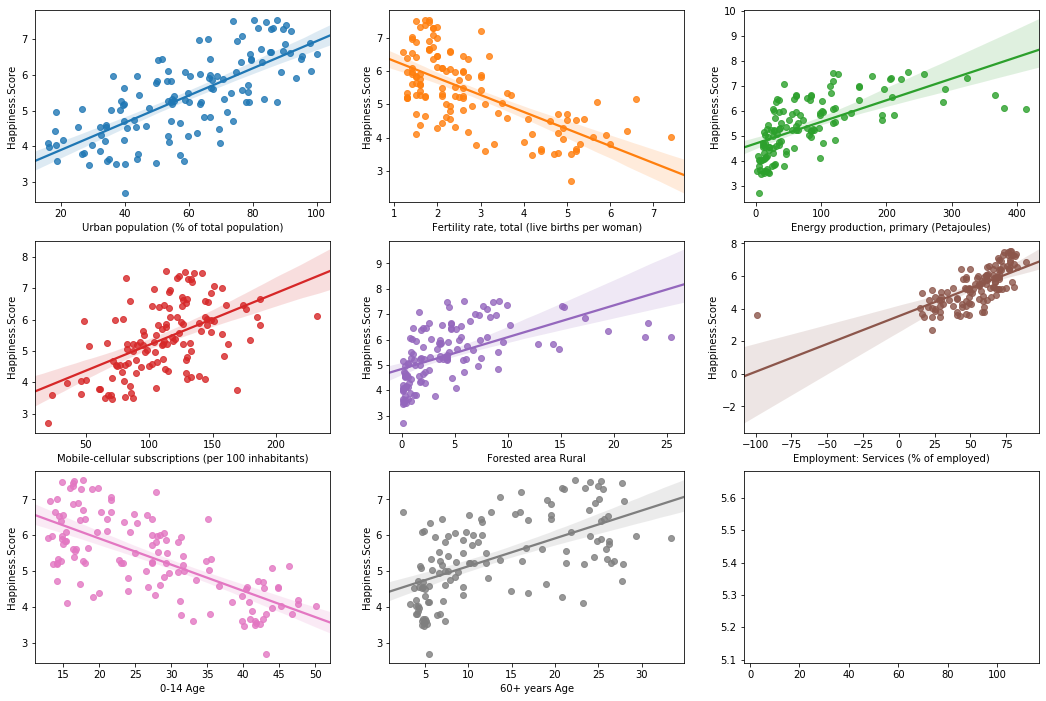

In [1455]:
features_to_analyse = ['Urban population (% of total population)',
       'Fertility rate, total (live births per woman)',
       'Energy production, primary (Petajoules)',
       'Mobile-cellular subscriptions (per 100 inhabitants)',
       'Forested area Rural', 'Employment: Services (% of employed)',
       '0-14 Age', '60+ years Age', 'Happiness.Score']
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='Happiness.Score', data=data_last4[features_to_analyse], ax=ax)

In [1449]:
X= data_last4.iloc[:,2:]
y= data_last4["Happiness.Score"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)


In [1434]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

print('train score: {:.2f}'.format(model.score(X_train, y_train)))
print('test score: {:.3f}'.format(model.score(X_test, y_test)))
y_predicted = model.predict(X_test)
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))

train score: 0.98
test score: 0.986
Mean squared error: 0.02


We predicted happiness score with GDP feature 1.00 accuracy
Then, we dropped the GDP data, and accuracy was 0.95
After, we add our new 'social' features with accuracy 0.97
Lastly, applied multivariate outlier removing and our last accuracy is 0.98.

The aim was not just increasing accuracy, but also trying to understand what other effects are there for happiness score either. Hope u all enjoy ;)

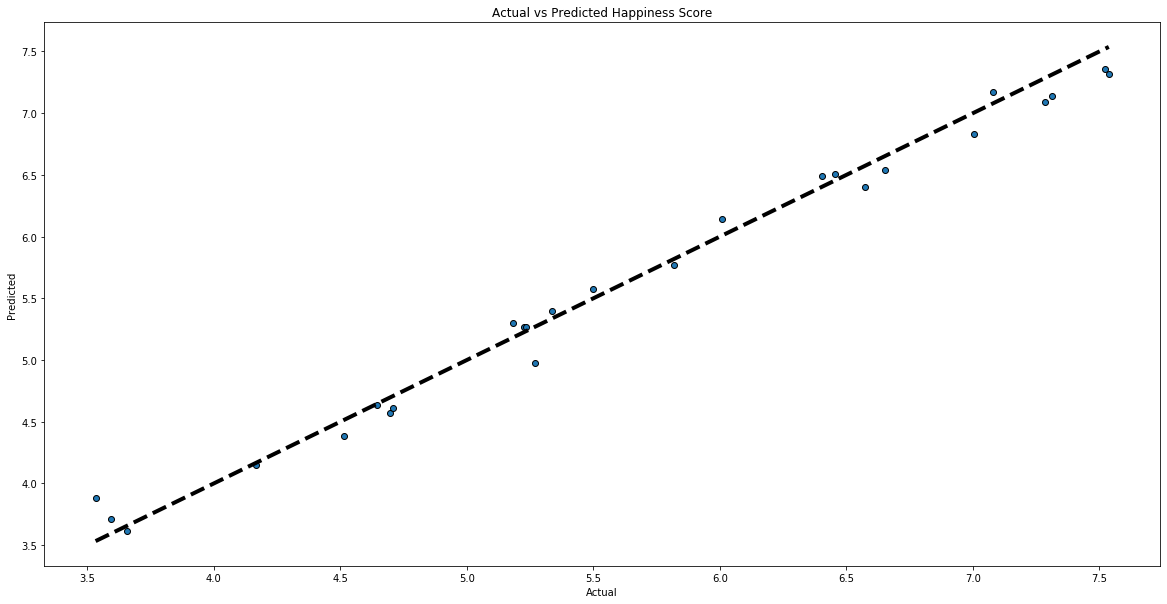

In [1436]:
y_predicted = model.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted Happiness Score")
plt.show()

### Final Comments

Happiness Score is positively correlated with the "Urban population (% of total population)" which means if people are living on urban areas more, happiness score is increasing. Also it is positively correlated with 'Forested area Rural' and it seems by looking these two features' correlation that the green life is effected for happiness score.

For the age distribution, happiness score is positively correlated with 60+ years age, and negatively correlated with 0-14 age and Fertility Rate. This gives us an insight. The more fertility rate increases the more 0-14 age people increases and generally happier countries have a dominance at older ages like Europe.

In conclusion, Happiness Score can be predicted without an economical data and we can have some insights that we should think over the social aspects and their reasons.

Hope u all enjoy ;)